Dataset Name: Advertising Dataset

🔗https://www.kaggle.com/datasets/ashydv/advertising-dataset
Business Scenario
A retail company spends money on advertising to increase product sales.

The marketing team believes that TV advertising spend has a strong impact on sales.
The management wants answers to the following question:
“If we increase our TV advertising budget, how will it affect sales?”
You are hired as a data analyst to analyze this relationship and build a predictive model.
📝 Tasks
Load the given dataset and explore its columns.

Use TV advertising spend as the input feature and Sales as the target variable.

Build a model that can learn the relationship between TV spend and Sales.

Train the model using historical data.

Predict sales for unseen data points.

Predict sales when TV advertising spend is 150 units.

Measure how accurate your predictions are.

Visualize:

The actual data points

The best-fit straight line learned by the model

Interpret the result in simple business terms:

Does higher TV spend increase sales?

Is the prediction error acceptable?

Suggest one improvement to make the prediction better.

Advertising Dataset | Kaggle
Kaggle is the world’s largest data science community with powerful tools and resources to help you achieve your data science goals.
 

In [1]:
## 1. Problem Framing
#Predict the  **sales**  based on **TV advertising spend**.
 
#- Input (X): Tv Advertising Spend
#- Output (Y): Sales
#- Type: Supervised Learning (Regression)

In [31]:
import pandas as pd
df=pd.read_csv('advertising.csv')
#Input data
X=df[['TV']]
# output salary
y=df['Sales']


In [32]:
import matplotlib.pyplot as plt
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())
# Check for missing values
print('Missing value count:',df.isnull().sum())
## Check for duplicate values
print('Duplicate value count:',df.duplicated().sum())
## No missing or duplicate values found


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 

In [33]:
## Data splitting

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 
X_train, X_test

(        TV
 79   116.0
 197  177.0
 38    43.1
 24    62.3
 122  224.0
 ..     ...
 106   25.0
 14   204.1
 92   217.7
 179  165.6
 102  280.2
 
 [160 rows x 1 columns],
         TV
 95   163.3
 15   195.4
 30   292.9
 158   11.7
 128  220.3
 115   75.1
 69   216.8
 170   50.0
 174  222.4
 45   175.1
 66    31.5
 182   56.2
 165  234.5
 78     5.4
 186  139.5
 177  170.2
 56     7.3
 152  197.6
 82    75.3
 68   237.4
 124  229.5
 16    67.8
 148   38.0
 93   250.9
 65    69.0
 60    53.5
 84   213.5
 67   139.3
 125   87.2
 132    8.4
 9    199.8
 18    69.2
 55   198.9
 75    16.9
 150  280.7
 104  238.2
 135   48.3
 137  273.7
 164  117.2
 76    27.5)

In [34]:
## Modeling

from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
 

Slope (m): 0.05548294393146318
Intercept (c): 7.007108428241851


In [10]:
# Prediction

y_pred = model.predict(X_test)
y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [11]:
import numpy as np
new_tv = np.array([[150]])
predicted_sales= model.predict(new_tv)
 
print("Predicted sales for 150 TV units spend:", predicted_sales[0])

Predicted sales for 150 TV units spend: 15.329550017961328


c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Evaluation

from sklearn.metrics import mean_squared_error,r2_score
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score_value = r2_score(y_test, y_pred)
print("R² Score:", r2_score_value)


Mean Squared Error: 6.101072906773964
R² Score: 0.802561303423698


c:\Users\aksha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


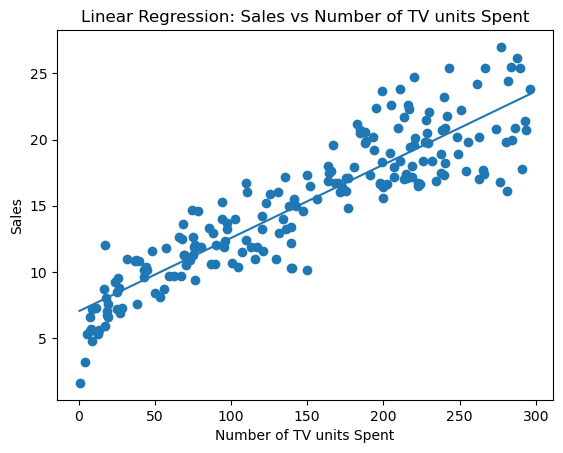

In [14]:
# Visualization

import matplotlib.pyplot as plt
import numpy as np
 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict salary for the line
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("Number of TV units Spent")
plt.ylabel("Sales")
plt.title("Linear Regression: Sales vs Number of TV units Spent")
 
# Show plot
plt.show()

Text(0.5, 1.0, 'TV Advertising Spend vs Sales')

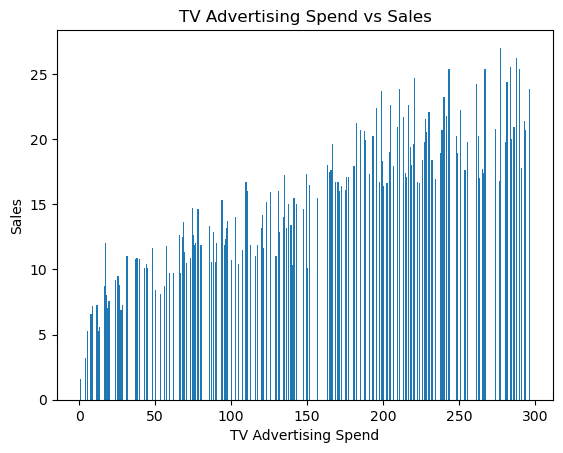

In [38]:
plt.bar(df['TV'],df['Sales'])
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV Advertising Spend vs Sales")

###  Yes,higher tv spend increases the sales.

### The prediction result is acceptable since we got acceptable mean square error.

### Use more proper historical data to make prediction better